# Regression models: Classic and deep neural network methods.

In [1]:
#Required libraries import
#Data preparation and analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Modeling and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

### Preparation and analysis of the dataset

In [2]:
#Import and sample of dataframe
df=pd.read_csv("data/garments_worker_productivity.csv")
df.sample(8)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1059,3/4/2015,Quarter1,sweing,Wednesday,9,0.75,18.79,1206.0,6240,34,0.0,0,0,52.0,0.750396
444,1/26/2015,Quarter4,sweing,Monday,6,0.80,11.61,1072.0,5760,50,0.0,0,0,32.0,0.800386
341,1/20/2015,Quarter3,sweing,Tuesday,4,0.70,22.52,983.0,10260,63,0.0,0,0,57.0,0.750068
531,1/31/2015,Quarter5,finishing,Saturday,6,0.60,3.94,NaN,1200,0,0.0,0,0,10.0,0.971867
646,2/7/2015,Quarter1,finishing,Saturday,9,0.80,3.94,NaN,960,0,0.0,0,0,8.0,0.771583
891,2/23/2015,Quarter4,sweing,Monday,7,0.75,30.10,709.0,6960,45,0.0,0,1,58.0,0.750770
92,1/6/2015,Quarter1,sweing,Tuesday,2,0.80,28.08,716.0,10350,50,0.0,0,0,57.5,0.800594
550,2/1/2015,Quarter1,sweing,Sunday,10,0.80,22.52,1282.0,6720,75,0.0,0,0,56.0,0.850532


In [3]:
df[['quarter', 'department']]

,quarter,department
0,Quarter1,sweing
1,Quarter1,finishing
2,Quarter1,sweing
3,Quarter1,sweing
4,Quarter1,sweing
...,...,...
1192,Quarter2,finishing
1193,Quarter2,finishing
1194,Quarter2,finishing
1195,Quarter2,finishing


In [4]:
#Dataframe dimensions
df.shape

(1197, 15)

In [5]:
#Dataframe information and attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [6]:
#Number of null values in the dataframe
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [7]:
#Null values are replaced with the mean of the attribute to which it belongs
df['wip']=df['wip'].fillna(df['wip'].mean())

In [8]:
#Statistics of the dataframe after removing nulls
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,1197,59,3/11/2015,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quarter,1197,5,Quarter1,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
department,1197,3,sweing,691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,1197,6,Wednesday,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team,1197.0,NaN,NaN,NaN,6.426901,3.463963,1.0,3.0,6.0,9.0,12.0
targeted_productivity,1197.0,NaN,NaN,NaN,0.729632,0.097891,0.07,0.7,0.75,0.8,0.8
smv,1197.0,NaN,NaN,NaN,15.062172,10.943219,2.9,3.94,15.26,24.26,54.56
wip,1197.0,NaN,NaN,NaN,1190.465991,1395.647261,7.0,970.0,1190.465991,1190.465991,23122.0
over_time,1197.0,NaN,NaN,NaN,4567.460317,3348.823563,0.0,1440.0,3960.0,6960.0,25920.0
incentive,1197.0,NaN,NaN,NaN,38.210526,160.182643,0.0,0.0,0.0,50.0,3600.0


In [9]:
#Possible values of categorical attributes are shown: department, quarter, day
print(df['department'].value_counts().index.to_list())
print(df['quarter'].value_counts().index.to_list())
print(df['day'].value_counts().index.to_list())

['sweing', 'finishing ', 'finishing']
['Quarter1', 'Quarter2', 'Quarter4', 'Quarter3', 'Quarter5']
['Wednesday', 'Sunday', 'Tuesday', 'Thursday', 'Monday', 'Saturday']


In [10]:
#Normalisation of the values of categorical attributes
df['department'] = df['department'].replace(['sweing'],['sewing'])
df['department'] = df['department'].replace(['finishing '],['finishing'])

<AxesSubplot:title={'center':'Distribution actual_productivity'}, ylabel='Frequency'>

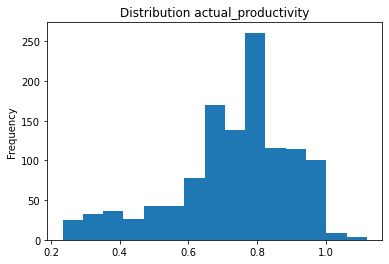

In [11]:
#Distribution of the output attribute is plotted
df['actual_productivity'].plot.hist(bins=15,title='Distribution actual_productivity')

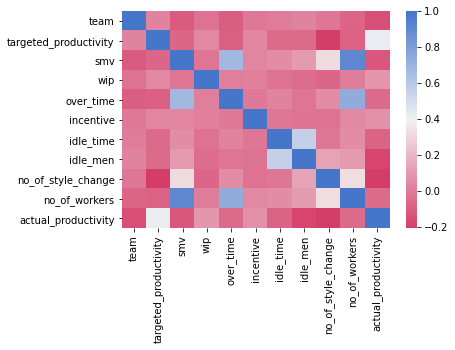

In [12]:
#Possible correlation between attributes can be observed graphically.
cmap = sns.diverging_palette(0, 255, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap)
plt.show()

## Linear Regression

In [13]:
#A copy of the df is made in order to conserve the worked set
data_r=df.copy()

In [14]:
#Attributes with input and output values are defined
Xr=data_r.drop(axis=1,columns=['date','quarter','department','day','actual_productivity'])
yr=data_r[['actual_productivity']]

In [15]:
#Statistical values are obtained from the set selected as input.
Xr.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.00,3.00,6.000000,9.000000,12.00
targeted_productivity,1197.0,0.729632,0.097891,0.07,0.70,0.750000,0.800000,0.80
smv,1197.0,15.062172,10.943219,2.90,3.94,15.260000,24.260000,54.56
wip,1197.0,1190.465991,1395.647261,7.00,970.00,1190.465991,1190.465991,23122.00
over_time,1197.0,4567.460317,3348.823563,0.00,1440.00,3960.000000,6960.000000,25920.00
incentive,1197.0,38.210526,160.182643,0.00,0.00,0.000000,50.000000,3600.00
idle_time,1197.0,0.730159,12.709757,0.00,0.00,0.000000,0.000000,300.00
idle_men,1197.0,0.369256,3.268987,0.00,0.00,0.000000,0.000000,45.00
no_of_style_change,1197.0,0.150376,0.427848,0.00,0.00,0.000000,0.000000,2.00
no_of_workers,1197.0,34.609858,22.197687,2.00,9.00,34.000000,57.000000,89.00


In [16]:
#The input values are normalised and the sets are separated again into training and test.
s = StandardScaler()
Xr_esc = s.fit_transform(Xr)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr_esc, yr, test_size=0.25, random_state=1)

In [17]:
#The model is defined and trained
model_rl=LinearRegression()
model_rl.fit(Xr_train,yr_train)

LinearRegression()

In [18]:
#Predictions are generated with training and test data.
yr_rl_pred_train = model_rl.predict(Xr_train)
yr_rl_pred_test = model_rl.predict(Xr_test)

In [19]:
#The MSE values of the training and test data are shown.
mse_rl_train = mean_squared_error(yr_rl_pred_train, yr_train)
print('Train error (MSE): ', mse_rl_train)
mse_rl_test = mean_squared_error(yr_rl_pred_test, yr_test)
print('Test error (MSE): ', mse_rl_test)

Train error (MSE):  0.02032637332963137
Test error (MSE):  0.02686282520346866


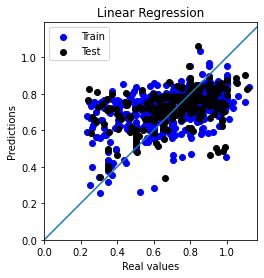

In [20]:
#Predictions are plotted using the training and test input data.
plt.scatter(yr_train, yr_rl_pred_train,color="b", label='Train')
plt.scatter(yr_test, yr_rl_pred_test,color="k", label='Test')
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.legend(loc="upper left")
plt.title("Linear Regression")
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## Neural Network Regression

In [21]:
# Import of TensorFlow and tf.keras libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
print(tf.__version__)

2.9.1


In [22]:
#The model is defined and compiled with two intermediate layers
model_rrn = Sequential([
Dense(64, activation='relu', input_shape=[Xr_train.shape[1]]),
Dense(128, activation='relu'),
Dense(64, activation='relu'),
Dense(1)
])

model_rrn.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae','mse'])

In [23]:
#The summary of the model is shown
model_rrn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,345
Trainable params: 17,345
Non-trainable params: 0
_________________________________________________________________


In [24]:
# A function is defined that displays the training process by printing a dot after each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

#The model is trained on a variable for later use
history = model_rrn.fit(Xr_train, yr_train, epochs=50, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


..................................................

In [25]:
#The values of the metrics for each epoch of the model training are obtained and the latest values are shown
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(5)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
45,0.010841,0.067875,0.010841,0.019750,0.097605,0.019750,45
46,0.011670,0.072853,0.011670,0.018200,0.089929,0.018200,46
47,0.010630,0.067202,0.010630,0.018189,0.087805,0.018189,47
48,0.010895,0.068486,0.010895,0.021267,0.106133,0.021267,48
49,0.011221,0.071245,0.011221,0.019235,0.091350,0.019235,49


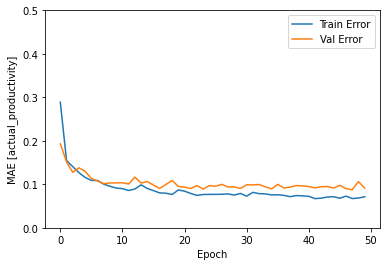

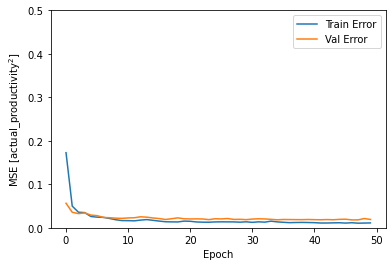

In [26]:
#A function is defined and the metrics are passed to be plotted to observe their evolution with each epoch
def plot_history(history):

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MAE [actual_productivity]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MSE [actual_productivity$^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.5])
  plt.legend()
  plt.show()

#The function is called on the model
plot_history(history)

In [27]:
#Metrics are extracted by equating the model with the training and test sets and the metric of interest is printed
loss, mae, mse_rrn_train = model_rrn.evaluate(Xr_train, yr_train, verbose=2)
print('Train error NN (MSE): {:5.4f} actual_productivity'.format(mse_rrn_train))

loss, mae, mse_rrn_test = model_rrn.evaluate(Xr_test, yr_test, verbose=2)
print("Test error NN (MSE): {:5.4f} actual_productivity".format(mse_rrn_test))

29/29 - 0s - loss: 0.0121 - mae: 0.0696 - mse: 0.0121 - 152ms/epoch - 5ms/step
Train error NN (MSE): 0.0121 actual_productivity
10/10 - 0s - loss: 0.0254 - mae: 0.1013 - mse: 0.0254 - 82ms/epoch - 8ms/step
Test error NN (MSE): 0.0254 actual_productivity


10/10 [==============================] - 0s 5ms/step


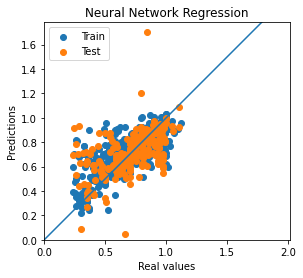

In [28]:
#Predictions are calculated and plotted using the training and test input data
yr_rn_pred_train = model_rrn.predict(Xr_train)
yr_rn_pred_test = model_rrn.predict(Xr_test)
plt.scatter(yr_train, yr_rn_pred_train, label='Train')
plt.scatter(yr_test, yr_rn_pred_test, label='Test')
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.legend(loc = "upper left")
plt.title("Neural Network Regression")
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## Comparative evaluation of results

In [29]:
#A comparison table with the error values of the models from the test data is shown
df_regr=pd.DataFrame({'MSE Regresion Lineal':[mse_rl_test],'MSE Regresión DNN':[mse_rrn_test]})
df_regr

,MSE Regresion Lineal,MSE Regresión DNN
0,0.026863,0.025405


In [30]:
#A DataFrame is generated and displayed with the values of the predictions made with linear regression and neural network
df_regr_pred=yr_test.copy()
df_regr_pred['RL Pred Productivity']=yr_rl_pred_test
df_regr_pred['RN Pred Productivity']=yr_rn_pred_test
df_regr_pred.sample(6)

,actual_productivity,RL Pred Productivity,RN Pred Productivity
142,0.735985,0.779581,0.672514
892,0.750651,0.731998,0.772886
455,0.350067,0.387513,0.344577
432,0.650408,0.625295,0.631047
49,0.800319,0.848250,0.853152
537,0.656764,0.554236,0.637379
